## 18일차 강의 (2021.7.28)
# 머신러닝

### 연습문제
- 행복데이터에서 'Logged GDP' 로 'Ladder score' 를 **선형회귀**로 예측하려고 한다.
- 가중치를 변화시키면 오차값이 변화한다. 여기서 오차값은 Mean Squared Error(MSE)로 계산한다.
- 절편값 b=0 으로 고정했을 때, 가중치 w 의 변화에 따른
> 여기서 구한 오차값 그래프를 **비용함수**(Cost Function)이라고 한다. 오차값의 변화를 그래프로 그리시오. (w 는 -2~2 사이의 값)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [44]:
happy.shape

(149, 20)

In [8]:
X = happy[['Logged GDP per capita']].values
y = happy['Ladder score'].values

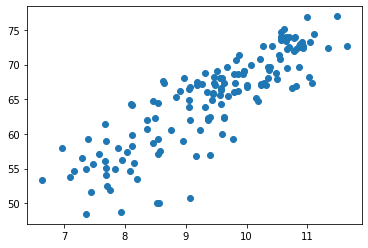

In [46]:
plt.scatter(X[:,0], y)

In [9]:
w = 0
b = 0
pred_y = w*X[:,0] + b # 예측값
error = ((y-pred_y)**2).mean() # 오차값(MSE)
error

31.757878060402685

In [10]:
w = 0.1
b = 0
pred_y = w*X[:,0] + b # 예측값
error = ((y-pred_y)**2).mean() # 오차값(MSE)
error

22.02828685295302

In [22]:
ws = np.arange(-3, 4, 0.1)
ws

array([-3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01,  2.66453526e-15,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00,  2.00000000e+00,  2.10000000e+00,
        2.20000000e+00,  

In [24]:
errors = []
b = 0
for w in ws:
    pred_y = w*X[:,0] + b # 예측값
    error = ((y-pred_y)**2).mean() # 오차값(MSE)
    errors.append(error)
    
errors

[1163.434656134228,
 1099.5251267428857,
 1037.4215952910065,
 977.1240617785905,
 918.6325262056374,
 861.9469885721473,
 807.0674488781206,
 753.9939071235567,
 702.726363308456,
 653.2648174328184,
 605.6092694966438,
 559.7597194999324,
 515.716167442684,
 473.47861332489884,
 433.0470571465767,
 394.4214989077176,
 357.60193860832163,
 322.58837624838867,
 289.38081182791893,
 257.97924534691225,
 228.38367680536862,
 200.59410620328808,
 174.61053354067064,
 150.43295881751632,
 128.06138203382505,
 107.49580318959688,
 88.7362222848318,
 71.7826393195298,
 56.63505429369092,
 43.29346720731512,
 31.757878060402405,
 22.02828685295278,
 14.104693584966244,
 7.987098256442799,
 3.675500867382448,
 1.1699014177851852,
 0.47029990765101326,
 1.5766963369799316,
 4.489090705771941,
 9.20748301402704,
 15.73187326174523,
 24.06226144892647,
 34.198647575570874,
 46.1410316416784,
 59.88941364724891,
 75.44379359228246,
 92.80417147677926,
 111.97054730073918,
 132.94292106416202,
 155

Text(0, 0.5, 'Error')

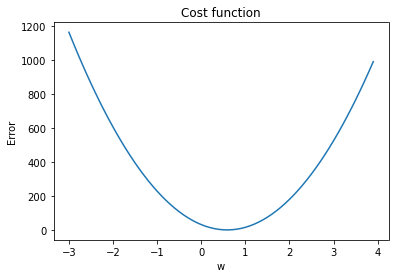

In [25]:
plt.title('Cost function')
plt.plot(ws, errors)
plt.xlabel('w')
plt.ylabel('Error')

In [31]:
X = happy[['Logged GDP per capita']].values
y = happy['Healthy life expectancy'].values

w = 1.
b = 1.

delta = 0.01
logs = []

pred_y = w * X[:,0] + b
error = ((y-pred_y)**2).mean() # Mean Squared Error
print(error)
logs.append(error)

for epoch in range(10000):
    w_next = w
    b_next = b
    
    pred_y2 = (w+0.0000001) * X[:,0] + b
    error2 = ((y-pred_y2)**2).mean()
    grad = (error2-error)/0.0000001 # 기울기 = 오차변화량/w변화량
    w_next = w - delta*grad # #w = w - 학습률*기울기
    
    pred_y2 = w * X[:,0] + (b+0.0000001)
    error2 = ((y-pred_y2)**2).mean()
    grad = (error2-error)/0.0000001 # 기울기 = 오차변화량/w변화량
    b_next = b - delta*grad
    
    w = w_next
    b = b_next
    pred_y = w * X[:,0] + b
    error = ((y-pred_y)**2).mean()
    
    print('%5d: %.5f, %.5f, %.5f' % (epoch, w, b, error))
    logs.append(error)

3010.2332125369126
    0: 11.39964, 2.09121, 2057.33729
    1: 2.81170, 1.19877, 1407.66167
    2: 9.90191, 1.94424, 964.71849
    3: 4.04659, 1.33727, 662.72359
    4: 8.88047, 1.84702, 456.82570
    5: 4.88821, 1.43469, 316.44590
    6: 8.18375, 1.78372, 220.73560
    7: 5.46171, 1.50408, 155.48060
    8: 7.70842, 1.74354, 110.98965
    9: 5.85240, 1.55437, 80.65548
   10: 7.38403, 1.71912, 59.97322
   11: 6.11846, 1.59164, 45.87157
   12: 7.16256, 1.70545, 36.25649
   13: 6.29955, 1.62002, 29.70033
   14: 7.01125, 1.69911, 25.22969
   15: 6.42270, 1.64235, 22.18096
   16: 6.90777, 1.69775, 20.10165
   17: 6.50635, 1.66054, 18.68331
   18: 6.83692, 1.69980, 17.71558
   19: 6.56308, 1.67592, 17.05510
   20: 6.78830, 1.70417, 16.60409
   21: 6.60144, 1.68937, 16.29590
   22: 6.75484, 1.71011, 16.08507
   23: 6.62729, 1.70151, 15.94064
   24: 6.73172, 1.71713, 15.84146
   25: 6.64460, 1.71275, 15.77314
   26: 6.71564, 1.72488, 15.72587
   27: 6.65609, 1.72338, 15.69294
   28: 6.70438, 1

(0.0, 100.0)

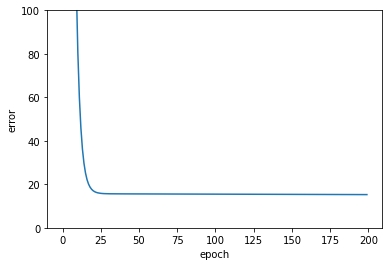

In [41]:
plt.plot(logs[:200])
plt.ylabel('error')
plt.xlabel('epoch')
plt.ylim(0,100)

### 선형회귀 경사하강법 공식 적용

In [45]:
# 데이터 전처리
X = happy[['Logged GDP per capita']].values
y = happy['Healthy life expectancy'].values

# 가중치 초기값 설정
w = 1.
b = 1.

# 학습률 설정
lr = 0.01
logs = []

# 경사하강법 반복 학습
for epoch in range(10000):
    pred_y = w * X[:,0] + b
    error = ((y-pred_y)**2).mean() # Mean Squared Error
    logs.append(error)
    
    # 가중치 조정
    pred_y = w*X[:,0]+b
    w = w + lr*2/len(y)*np.sum(((y-pred_y)*X[:,0]))
    b = b + lr*2/len(y)*np.sum(y-pred_y)
    
    print('%5d: %.5f, %.5f, %.5f' % (epoch, w, b, error))
    logs.append(error)

    0: 11.39964, 2.09121, 3010.23321
    1: 2.81170, 1.19877, 2057.33736
    2: 9.90191, 1.94424, 1407.66170
    3: 4.04659, 1.33727, 964.71856
    4: 8.88047, 1.84702, 662.72362
    5: 4.88821, 1.43468, 456.82575
    6: 8.18375, 1.78371, 316.44592
    7: 5.46171, 1.50408, 220.73563
    8: 7.70842, 1.74354, 155.48060
    9: 5.85240, 1.55437, 110.98967
   10: 7.38403, 1.71912, 80.65548
   11: 6.11846, 1.59164, 59.97323
   12: 7.16256, 1.70545, 45.87157
   13: 6.29955, 1.62002, 36.25649
   14: 7.01125, 1.69911, 29.70032
   15: 6.42270, 1.64235, 25.22969
   16: 6.90777, 1.69775, 22.18095
   17: 6.50635, 1.66054, 20.10165
   18: 6.83692, 1.69980, 18.68330
   19: 6.56308, 1.67592, 17.71559
   20: 6.78830, 1.70417, 17.05510
   21: 6.60144, 1.68937, 16.60409
   22: 6.75484, 1.71011, 16.29590
   23: 6.62729, 1.70151, 16.08507
   24: 6.73172, 1.71713, 15.94063
   25: 6.64460, 1.71275, 15.84146
   26: 6.71564, 1.72488, 15.77314
   27: 6.65609, 1.72337, 15.72587
   28: 6.70438, 1.73313, 15.69294


(0.0, 100.0)

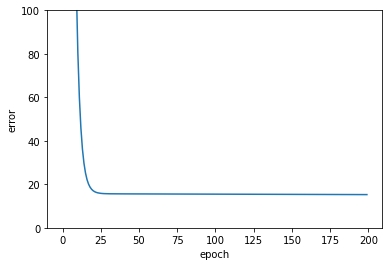

In [43]:
plt.plot(logs[:200])
plt.ylabel('error')
plt.xlabel('epoch')
plt.ylim(0,100)

In [48]:
x1 = np.array([2,5])
x2 = np.array([5,2])
np.sqrt(((x1-x2)**2).sum())

4.242640687119285

In [49]:
x3 = np.array([3,7])

In [51]:
np.vstack([x1,x2,x3])

array([[2, 5],
       [5, 2],
       [3, 7]])

In [52]:
X = np.zeros([3,2])
X[0] = x1
X[1] = x2
X[2] = x3
X

array([[2., 5.],
       [5., 2.],
       [3., 7.]])